This is a notebook with an example of the simulations carried out in https://arxiv.org/abs/2312.17146. We will use the Hydrogen molecule for this example.

In [1]:
#import libraries
import tequila as tq
import numpy as np
import pickle
from matplotlib import pyplot as plt
import cirq
import scipy
import k_commute

In [2]:
#initialize a list of bond-lengths we will consider here
equilibrium_bl = 0.741
bond_lengths = [0.601, 0.741, 0.881]
bond_lengths.extend([i*0.5 for i in range(1,9)])
bond_lengths.sort()

print("We are considering the following configurations:", bond_lengths)

We are considering the following configurations: [0.5, 0.601, 0.741, 0.881, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [38]:
#get Hamiltonian and commuting groups for a molecular configuration. The diagonalizing circuits are now generated using k-commutativity

Hamiltonians = []
Graph_circuits = [] # Previously retrieved from .pickle containing tq circuits

for bond in bond_lengths:
    file = open("../Hamiltonians/H2/H2_Hamiltonian_for_bond_length_{0}.pickle".format(bond),'rb')
    mol_Ham = pickle.load(file)
    file.close()
              
    Hamiltonians.append(mol_Ham)

    file = open("../groups_and_circuits/H2/H2_groups_and_circuits_for_bond_length_{0}.pickle".format(bond),'rb')
    groups, circuits = pickle.load(file)
    file.close()
    
    Graph_circuits.append(circuits)

groups_and_circuits = []
just_groups = []
k_circuits = []
for hamiltonian in Hamiltonians:
    groups, circuits = k_commute.diag_circ_from_ham(mol_Ham.to_openfermion(), 4)
    print(circuits)
    tqcircuits = []
        
    just_groups.append(groups)
    groups_and_circuits.append(zip(groups,circuits))
    k_circuits.append(circuits)

Hams_groups_circs = zip(Hamiltonians,groups_and_circuits)


[cirq.Circuit(), cirq.Circuit([
    cirq.Moment(
        cirq.PhasedXZGate(axis_phase_exponent=0.5, x_exponent=0.5, z_exponent=0.0).on(cirq.LineQubit(1)),
        cirq.PhasedXZGate(axis_phase_exponent=0.5, x_exponent=0.5, z_exponent=0.0).on(cirq.LineQubit(2)),
        cirq.PhasedXZGate(axis_phase_exponent=-0.25, x_exponent=0.5, z_exponent=0.0).on(cirq.LineQubit(3)),
    ),
    cirq.Moment(
        cirq.CZ(cirq.LineQubit(0), cirq.LineQubit(1)),
    ),
    cirq.Moment(
        cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.0, z_exponent=1.0).on(cirq.LineQubit(0)),
        cirq.PhasedXZGate(axis_phase_exponent=-0.5, x_exponent=0.5, z_exponent=-8.881784197001252e-16).on(cirq.LineQubit(1)),
    ),
    cirq.Moment(
        cirq.CZ(cirq.LineQubit(1), cirq.LineQubit(2)),
    ),
    cirq.Moment(
        cirq.PhasedXZGate(axis_phase_exponent=0.0, x_exponent=0.0, z_exponent=1.0).on(cirq.LineQubit(1)),
        cirq.PhasedXZGate(axis_phase_exponent=-0.25, x_exponent=0.49999999999999956, z_

In [32]:
k_commute.diag_circ_from_ham(mol_Ham.to_openfermion(),4)

([[(0.11352455639641396+0j)*Z(q(1))*Z(q(3)),
   (0.11336252474119067+0j)*Z(q(0))*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.11336252474119067+0j)*Z(q(0))*Z(q(1))*Z(q(2)),
   (0.11320162962479371+0j)*Z(q(1)),
   (0.08028921449423986+0j)*Y(q(0))*Z(q(1))*Y(q(2))*Z(q(3)),
   (0.08028921449423986+0j)*X(q(0))*Z(q(1))*X(q(2)),
   (0.08028921449423986+0j)*X(q(0))*Z(q(1))*X(q(2))*Z(q(3)),
   (0.08028921449423986+0j)*Y(q(0))*Z(q(1))*Y(q(2)),
   (0.03307331024695082+0j)*Z(q(0))*Z(q(2)),
   (0.03307331024695082+0j)*Z(q(0))*Z(q(2))*Z(q(3))],
  [(0.040355234178530416+0j)*Z(q(0)),
   (0.040355234178530396+0j)*Z(q(0))*Z(q(1)),
   (0.038921095032665304+0j)*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.038921095032665276+0j)*Z(q(2))]],
 [,
  0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─

In [35]:
mol_Ham.to_openfermion()

-0.5458562117523817 [] +
0.08028921449423986 [X0 Z1 X2] +
0.08028921449423986 [X0 Z1 X2 Z3] +
0.08028921449423986 [Y0 Z1 Y2] +
0.08028921449423986 [Y0 Z1 Y2 Z3] +
0.040355234178530416 [Z0] +
0.040355234178530396 [Z0 Z1] +
0.11336252474119067 [Z0 Z1 Z2] +
0.11336252474119067 [Z0 Z1 Z2 Z3] +
0.03307331024695082 [Z0 Z2] +
0.03307331024695082 [Z0 Z2 Z3] +
0.11320162962479371 [Z1] +
0.038921095032665304 [Z1 Z2 Z3] +
0.11352455639641396 [Z1 Z3] +
0.038921095032665276 [Z2]

In [33]:
Hamiltonians[-1].to_openfermion()

-0.5458562117523817 [] +
0.08028921449423986 [X0 Z1 X2] +
0.08028921449423986 [X0 Z1 X2 Z3] +
0.08028921449423986 [Y0 Z1 Y2] +
0.08028921449423986 [Y0 Z1 Y2 Z3] +
0.040355234178530416 [Z0] +
0.040355234178530396 [Z0 Z1] +
0.11336252474119067 [Z0 Z1 Z2] +
0.11336252474119067 [Z0 Z1 Z2 Z3] +
0.03307331024695082 [Z0 Z2] +
0.03307331024695082 [Z0 Z2 Z3] +
0.11320162962479371 [Z1] +
0.038921095032665304 [Z1 Z2 Z3] +
0.11352455639641396 [Z1 Z3] +
0.038921095032665276 [Z2]

In [36]:
k_commute.diag_circ_from_ham(Hamiltonians[0].to_openfermion(),4)


([[(-0.369144315061426+0j)*Z(q(2)),
   (-0.369144315061426+0j)*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.21393531019748213+0j)*Z(q(0)),
   (0.21393531019748213+0j)*Z(q(0))*Z(q(1)),
   (0.18620984258028633+0j)*Z(q(1))*Z(q(3)),
   (0.179926509753495+0j)*Z(q(1)),
   (0.1768099603752391+0j)*Z(q(0))*Z(q(1))*Z(q(2))*Z(q(3)),
   (0.1768099603752391+0j)*Z(q(0))*Z(q(1))*Z(q(2)),
   (0.1345924034500715+0j)*Z(q(0))*Z(q(2)),
   (0.1345924034500715+0j)*Z(q(0))*Z(q(2))*Z(q(3))],
  [(0.04221755692516757+0j)*Y(q(0))*Z(q(1))*Y(q(2))*Z(q(3)),
   (0.04221755692516757+0j)*X(q(0))*Z(q(1))*X(q(2)),
   (0.04221755692516757+0j)*X(q(0))*Z(q(1))*X(q(2))*Z(q(3)),
   (0.04221755692516757+0j)*Y(q(0))*Z(q(1))*Y(q(2))]],
 [0: ───PhXZ(a=0,x=0.5,z=0)─────@───PhXZ(a=0,x=-0.5,z=0)─────@───PhXZ(a=-2.22e-16,x=0.5,z=0)───@───PhXZ(a=0,x=0,z=-0.5)───@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                              │                  

In [37]:
k_circuits[0]

[,
 0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───]

In [6]:
from cirq.contrib.qasm_import import circuit_from_qasm


In [7]:
k_circuits[0][1].unitary()

array([[-7.07106781e-01-7.07106781e-01j, -9.71445147e-17-1.38777878e-17j,
        -3.96140886e-16-3.68385310e-16j,  0.00000000e+00+2.77555756e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 3.36589805e-16+3.36589805e-16j,  5.55111512e-17+5.55111512e-17j,
        -7.07106781e-01-7.07106781e-01j, -8.32667268e-17-2.77555756e-17j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+0

In [8]:
a = Graph_circuits[0][1]
b = tq.export_open_qasm(a)
b = circuit_from_qasm(b)

c = b.unitary()-k_circuits[0][1].unitary()

In [9]:
print(c)

[[ 1.20710678e+00+7.07106781e-01j  9.71445147e-17+1.38777878e-17j
   3.96140886e-16+3.68385310e-16j  0.00000000e+00-2.77555756e-17j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-3.36589805e-16-3.36589805e-16j -5.00000000e-01-5.55111512e-17j
   7.07106781e-01+7.07106781e-01j  8.32667268e-17+2.77555756e-17j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -5.00000000e-01+0.00000000e+00j
   0.0000

In [10]:
scipy.linalg.norm(c,'fro')

5.656854249492381

In [11]:
len(just_groups[0])

2

In [12]:
k_circuits[0]

[,
 0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───]

In [13]:
all_tq_diags = []
for circ_list in k_circuits:
    tq_circuits = []
    for circuit in circ_list:
        qasm_circuit = circuit.to_qasm()
        tq_circuits.append(tq.import_open_qasm(qasm_circuit))
    all_tq_diags.append(tq_circuits)

In [14]:
circuit = k_circuits[0][1]


In [15]:
just_groups[0][0][4]

(0.08028921449423986+0j)*Y(q(0))*Z(q(1))*Y(q(2))*Z(q(3))

In [16]:
circuit

0: ─────────────────────────────@───PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                │
1: ───PhXZ(a=0.5,x=0.5,z=0)─────@───PhXZ(a=-0.5,x=0.5,z=-8.88e-16)───@───PhXZ(a=0,x=0,z=1)─────────────────────────────────────────────────────────────────────────────
                                                                     │
2: ───PhXZ(a=0.5,x=0.5,z=0)──────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=-0.25)───@───PhXZ(a=0.5,x=-0.5,z=0)────@───PhXZ(a=-0.5,x=0.5,z=-0.75)────
                                                                                                       │                             │
3: ───PhXZ(a=-0.25,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────@───PhXZ(a=-0.25,x=0.5,z=0)───@───PhXZ(a=-0.75,x=0.75,z=0.75)───

In [17]:
#let's calculate the ground state energies of the molecule at the different configurations
FCI_eners = []

for Ham in Hamiltonians:
    v,vv = np.linalg.eigh(Ham.to_matrix())
    FCI_eners.append(v[0])
    
print("The exact ground state energies of the molecules are:", FCI_eners)

The exact ground state energies of the molecules are: [-1.0551597946880173, -1.1166462657704586, -1.1372744055258712, -1.1237206708647083, -1.1011503301329568, -0.9981493533579184, -0.9486411121296494, -0.9360549199436622, -0.9336318445559841, -0.9332284055492808, -0.9331713618435846]


In [18]:
#Calculating HF energies
num_qubits = 4

HF_ener = []
for Ham in Hamiltonians:
    #simulating reference state-prep circuit (in BK basis)
    ref = tq.QCircuit()    
    ref += tq.gates.X(0)
    
    Exp = tq.ExpectationValue(U=ref, H= Ham)
    energy = tq.simulate(Exp, backend="qulacs")
    #print(energy)
    HF_ener.append(energy)
    
    
print("Hartree-Fock energy:", HF_ener)

Hartree-Fock energy: [-1.0429962747511712, -1.1014552070447619, -1.1167061372172085, -1.0961661385920694, -1.0661086491853156, -0.9108735543822686, -0.7837926540830397, -0.7029435995786047, -0.6560482510473122, -0.6298201100573617, -0.6148699739991873]


In [19]:
ref

circuit: 
X(target=(0,))

In [20]:
g_seed = 1

def random_number(num_param):
    """
    This function calls the numpy.random.randn function with
    a new seed every time, and returns the values
    """
    global g_seed
    rand_state = np.random.RandomState(seed = g_seed)
    g_seed += int(np.abs(np.random.randn(1)[0]*10) + 1)
    return rand_state.randn(num_param)

In [21]:
#Now we construct the H-GSA ansatz and carry optimization
hgsa_results = []
mean_vqe_eners = []
std_vqe_eners = []

mean_vqe_errors = []
vqe_errors_min = []
vqe_errors_max = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, Graph_circuits)):
    if index == 5:
        #construct the CCA
        HGSA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        HGSA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[1:]):
        
            #Add the Clifford circuit
            HGSA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                
                HGSA += tq.gates.Rz(var_1, qubit)                
                HGSA += tq.gates.Ry(var_2, qubit)
                HGSA += tq.gates.Rz(var_3, qubit)                
                HGSA += tq.gates.Ry(-1*var_2, qubit)
                HGSA += tq.gates.Rz(-1*var_1, qubit)
            
            #Add the Clifford circuit inverse
            HGSA += cir
        
        energies = []
        errors = []
        num_samples = 5
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in HGSA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            
            print(initial_values)
            Exp = tq.ExpectationValue(U=HGSA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = initial_values, tol= 1e-6, method="bfgs" ,backend="qulacs", silent="True")
            hgsa_results.append(result)
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners.append(np.mean(energies))
        std_vqe_eners.append(np.std(energies))
        
        mean_vqe_errors.append(np.mean(errors))
        vqe_errors_min.append(np.min(errors))
        vqe_errors_max.append(np.max(errors))
            
    
print("Energy from VQE with HGSA:", mean_vqe_eners)

{th_q0_l0: 1.6243453636632417, ph_q0_l0: 0.44122748688504143, la_q0_l0: 1e-06, th_q1_l0: 1.2856054152322811, ph_q1_l0: -1.2640526647764023, la_q1_l0: 1e-06, th_q2_l0: -0.41475721425159034, ph_q2_l0: -0.05446361233749771, la_q2_l0: 1e-06, th_q3_l0: -0.6075476972112264, ph_q3_l0: -0.29050317334863224, la_q3_l0: 1e-06}


{th_q0_l0: -0.9217709932130886, ph_q0_l0: -0.43149555155981106, la_q0_l0: 1e-06, th_q1_l0: 0.8509974083019054, ph_q1_l0: 0.22444485207555556, la_q1_l0: 1e-06, th_q2_l0: 0.2302992417822972, ph_q2_l0: 0.7434532155133556, la_q2_l0: 1e-06, th_q3_l0: 0.4939919387087027, ph_q3_l0: -1.1338383343090317, la_q3_l0: 1e-06}
{th_q0_l0: -1.0856306033005612, ph_q0_l0: 0.4502232110787815, la_q0_l0: 1e-06, th_q1_l0: -1.0860854520253287, ph_q1_l0: 0.624350658191814, la_q1_l0: 1e-06, th_q2_l0: 0.5849179108439292, ph_q2_l0: 0.2730065808708735, la_q2_l0: 1e-06, th_q3_l0: -1.193524198146228, ph_q3_l0: -0.5592259401132624, la_q3_l0: 1e-06}
{th_q0_l0: -0.8827791492803521, ph_q0_l0: 0.709691454944267, la_q0_l0: 1e-06, th_q1_l0: 1.684925790874923, ph_q1_l0: -2.2943822355832353, la_q1_l0: 1e-06, th_q2_l0: -0.9095423466056333, ph_q2_l0: 0.9505618167702432, la_q2_l0: 1e-06, th_q3_l0: 0.8297432969194358, ph_q3_l0: -0.6330209695658661, la_q3_l0: 1e-06}
{th_q0_l0: 0.40766930792101624, ph_q0_l0: 0.0077659634999328086,

In [22]:
result.angles

{th_q0_l0: 0.6814688486731806, ph_q0_l0: 1.857937814098194, la_q0_l0: -1.1234649822075422, th_q1_l0: 0.4450962305113113, ph_q1_l0: -1.5159944779867047, la_q1_l0: 2.2992419897273054e-07, th_q2_l0: -0.4010502469896386, ph_q2_l0: -0.9869174323930271, la_q2_l0: 1.6610633268886039e-06, th_q3_l0: 0.9289009957617244, ph_q3_l0: 1.469248215457057, la_q3_l0: -5.425822199319727e-07}

In [23]:
#repeat of HGSA code, now with K-commutativity diagonalizing circuits instead
mean_vqe_eners2 = []
std_vqe_eners2 = []
all_results = []
mean_vqe_errors2 = []
vqe_errors_min2 = []
vqe_errors_max2 = []

for index, (Ham, circuits) in enumerate(zip(Hamiltonians, all_tq_diags)): 
    if index == 5:
        #construct the CCA
        KA = tq.QCircuit()
        
        #Add the reference state-prep circuit (in BK basis)
        KA += tq.gates.X(0)
        
        #only considering the non-empty circuits
        for i, cir in enumerate(circuits[:]):
            print(i)
            print('the circuit is ', cir)
            #Add the Clifford circuit
            KA += cir.dagger()
            
            #Add the single qubit rotation layer
            for qubit in range(num_qubits):
                var_1 = tq.Variable("th_q{0}_l{1}".format(qubit, i))
                var_2 = tq.Variable("ph_q{0}_l{1}".format(qubit, i))
                var_3 = tq.Variable("la_q{0}_l{1}".format(qubit, i))
                print('the vars', var_1, var_2, var_3)
                KA += tq.gates.Rz(var_1, qubit)                
                KA += tq.gates.Ry(var_2, qubit)
                KA += tq.gates.Rz(var_3, qubit)                
                KA += tq.gates.Ry(-1*var_2, qubit)
                KA += tq.gates.Rz(-1*var_1, qubit)
                print('circuit after vars', KA)
            
            #Add the Clifford circuit inverse
            KA += cir
        
        print('before optimization:', KA)
        tq.draw(KA)
    
        energies = []
        errors = []
        num_samples = 5
        for samp in range(num_samples):
            initial_values = {}
    
            for var_ in KA.extract_variables():
                if "th" in str(var_) or "ph" in str(var_):
                    initial_values[var_] = random_number(1)[0]
                else:
                    initial_values[var_] = 1e-6
            print(initial_values)
            
            Exp = tq.ExpectationValue(U=KA, H= Ham)
            result = tq.minimize(objective=Exp,initial_values = initial_values, tol= 1e-8, method="bfgs" ,backend="qulacs", silent="True")
            all_results.append(result)
            print('after opt:', KA)
            tq.draw(KA)
    
            energy = result.energy
            #print(energy)
            energies.append(energy)
            errors.append(energy - FCI_eners[index])
        
        mean_vqe_eners2.append(np.mean(energies))
        std_vqe_eners2.append(np.std(energies))
        
        mean_vqe_errors2.append(np.mean(errors))
        vqe_errors_min2.append(np.min(errors))
        vqe_errors_max2.append(np.max(errors))
        
    
print("Energy from VQE with K-Commutativity Ansatz:", mean_vqe_eners2)

0
the circuit is  circuit: 

the vars th_q0_l0 ph_q0_l0 la_q0_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=(0,), parameter=f([th_q0_l0]))

the vars th_q1_l0 ph_q1_l0 la_q1_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=(0,), parameter=f([th_q0_l0]))
Rz(target=(1,), parameter=th_q1_l0)
Ry(target=(1,), parameter=ph_q1_l0)
Rz(target=(1,), parameter=la_q1_l0)
Ry(target=(1,), parameter=f([ph_q1_l0]))
Rz(target=(1,), parameter=f([th_q1_l0]))

the vars th_q2_l0 ph_q2_l0 la_q2_l0
circuit after vars circuit: 
X(target=(0,))
Rz(target=(0,), parameter=th_q0_l0)
Ry(target=(0,), parameter=ph_q0_l0)
Rz(target=(0,), parameter=la_q0_l0)
Ry(target=(0,), parameter=f([ph_q0_l0]))
Rz(target=

In [24]:
all_results[0].angles

{th_q0_l0: 0.2384210371886072, ph_q0_l0: -0.12168985943203783, la_q0_l0: 6.427274215985368e-07, th_q1_l0: 0.056867407918200344, ph_q1_l0: -0.7826314738534372, la_q1_l0: -1.0515081686569309e-07, th_q2_l0: -0.40671821201973385, ph_q2_l0: 0.14716834511709304, la_q2_l0: 5.895418099628084e-07, th_q3_l0: 1.2788187123054044, ph_q3_l0: 0.08092915171529338, la_q3_l0: 1.1112379714388592e-06, th_q0_l1: -0.39163246420170544, ph_q0_l1: 0.782055058018345, la_q0_l1: 1.761553858642858e-08, th_q1_l1: -0.39281112969073106, ph_q1_l1: 0.5897518478825746, la_q1_l1: -8.427547924837674e-08, th_q2_l1: 1.2049592680051089, ph_q2_l1: -0.6681285004770793, la_q2_l1: 1.440469632503409e-07, th_q3_l1: 0.3514209950220752, ph_q3_l1: 0.2598346930861706, la_q3_l1: 7.491112707524384e-07}

In [25]:
all_results[0].history

OptimizerHistory(energies=[-0.9108735543822011, -0.9108735543822493, -0.9108735543822549, -0.910873554382259], gradients=[{th_q0_l0: -1.1657341758564144e-15, ph_q0_l0: -7.888134589961737e-14, la_q0_l0: 1.0329302468914392e-08, th_q1_l0: -3.3306690738754696e-16, ph_q1_l0: -2.9753977059954195e-14, la_q1_l0: 4.28219563142207e-08, th_q2_l0: 1.1657341758564144e-15, ph_q2_l0: 7.582823258189819e-14, la_q2_l0: 1.1936157839897987e-08, th_q3_l0: 4.996003610813204e-16, ph_q3_l0: -4.723998969780041e-14, la_q3_l0: -3.804395742879052e-09, th_q0_l1: 5.551115123125783e-17, ph_q0_l1: 2.7922109069322687e-14, la_q0_l1: 4.931264407925795e-08, th_q1_l1: 1.6653345369377348e-16, ph_q1_l1: 4.3298697960381105e-14, la_q1_l1: 3.9864209600004585e-08, th_q2_l1: -5.551115123125783e-16, ph_q2_l1: -3.042011087472929e-14, la_q2_l1: 2.926583475559852e-08, th_q3_l1: 1.6653345369377348e-16, ph_q3_l1: 2.609024107869118e-14, la_q3_l1: 7.134793367225001e-09}, {th_q0_l0: -8.881784197001252e-16, ph_q0_l0: -6.181166689600559e-1

In [26]:
circuits

[circuit: ,
 circuit: 
 Rz(target=(1,), parameter=0.0)
 Rx(target=(1,), parameter=1.5707963267948966)
 Rz(target=(1,), parameter=1.5707963267948966)
 Rx(target=(1,), parameter=-1.5707963267948966)
 Rz(target=(1,), parameter=0.0)
 Rz(target=(2,), parameter=0.0)
 Rx(target=(2,), parameter=1.5707963267948966)
 Rz(target=(2,), parameter=1.5707963267948966)
 Rx(target=(2,), parameter=-1.5707963267948966)
 Rz(target=(2,), parameter=0.0)
 Rz(target=(3,), parameter=2.356194490192345)
 Rx(target=(3,), parameter=1.5707963267948966)
 Rz(target=(3,), parameter=1.5707963267948966)
 Rx(target=(3,), parameter=-1.5707963267948966)
 Rz(target=(3,), parameter=3.9269908169872414)
 Z(target=(1,), control=(0,))
 Rz(target=(0,), parameter=1.5707963267948966)
 Rx(target=(0,), parameter=1.5707963267948966)
 Rz(target=(0,), parameter=0.0)
 Rx(target=(0,), parameter=-1.5707963267948966)
 Rz(target=(0,), parameter=1.5707963267948966)
 Rz(target=(1,), parameter=3.141592653589793)
 Rx(target=(1,), parameter=1.5707

In [27]:
tq.draw(KA)

0: ───X─────────────────────────────────────────Z^(0.318309886183791*f((th_q0_l0,))_0)────Y^(0.318309886183791*f((ph_q0_l0,))_1)────Z^(0.318309886183791*f((la_q0_l0,))_2)────Y^(0.318309886183791*f((ph_q0_l0,))_3)────Z^(0.318309886183791*f((th_q0_l0,))_4)───S^-1────X^0.5─────Z^0──────X^-0.5───S^-1────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────────────Z^(0.318309886183791*f((th_q0_l1,))_20)───Y^(0.318309886183791*f((ph_q0_l1,))_21)───Z^(0.318309886183791*f((la_q0_l1,))_22)───Y^(0.318309886183791*f((ph_q0_l1,))_23)───Z^(0.318309886183791*f((th_q0_l1,))_24)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

''

ValueError: 'x' and 'y' must have the same size

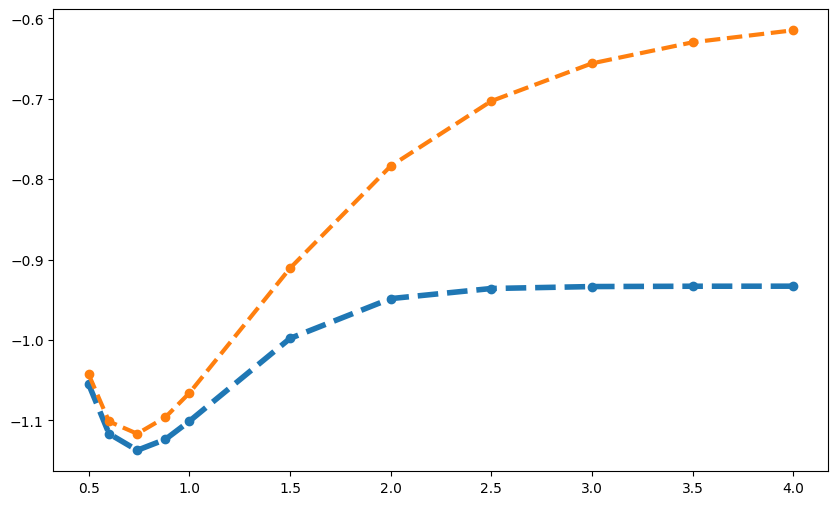

In [28]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.plot(bond_lengths, FCI_eners, marker="o", markersize=6, linestyle="--", linewidth=4, label="FCI Energy")
plt.plot(bond_lengths, HF_ener, marker="o", markersize=6, linestyle="--", linewidth=3, label="HF")
plt.errorbar(bond_lengths, mean_vqe_eners, std_vqe_eners, marker="X", markersize=3, linestyle="--", linewidth=2, label="HGSA VQE Energy")
plt.errorbar(bond_lengths, mean_vqe_eners2, std_vqe_eners2, marker="X", markersize=3, linestyle="--", linewidth=2, label="KA VQE Energy")
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

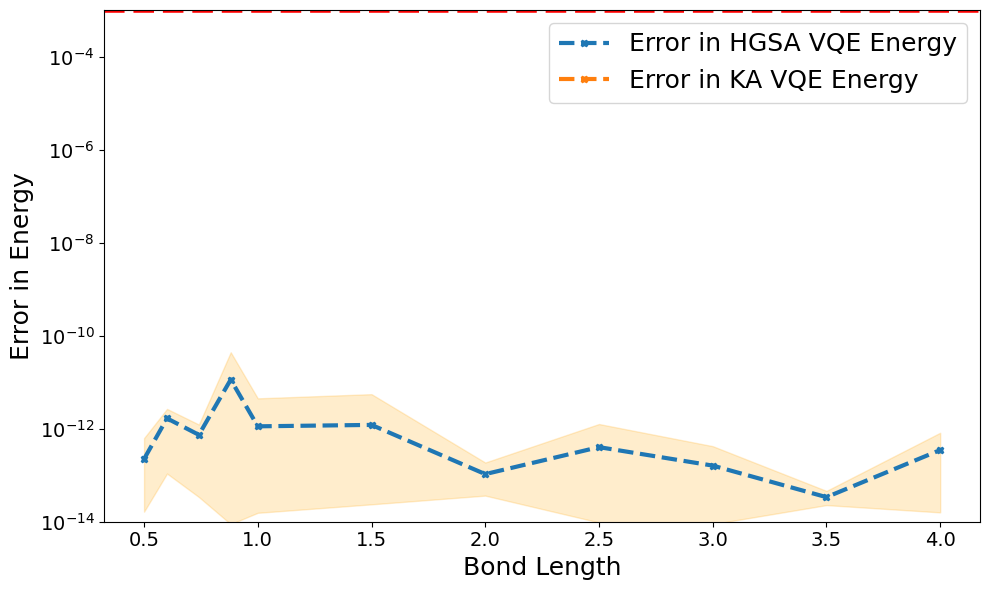

In [ ]:
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.rc('legend',fontsize=18)
plt.ylim(1e-14, 1e-3)
plt.yscale("log")
plt.axhline(y=1e-3, color='r', linestyle='--',linewidth=4)
plt.plot(bond_lengths, mean_vqe_errors, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in HGSA VQE Energy")
plt.plot(bond_lengths, mean_vqe_errors2, marker="X", markersize=5, linestyle="--", linewidth=3, label="Error in KA VQE Energy")

plt.fill_between(bond_lengths, vqe_errors_min, vqe_errors_max, alpha=0.2, color ='orange')
plt.xlabel('Bond Length', fontsize=18)
plt.ylabel('Error in Energy', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()